### K-mean clustering algorithm

In this notebook we construct and visualize the k-mean clsutering algorithm. We start with two separate set of points. We then 

1. Chose the number of clusters. In this case, we pick 2.
2. Set an initial guess for the center. For illustration purposes, we pick a really bad starting point. 
3. For each point, we check to which center it is closer, and assign it to its cluster 
4. We calculate new centers with the points we have assigned to that custer.
5. Repeat 3 and 4 untile convergence, i.e. until the new centers calculate are equal to the old centers.

In [1]:
import numpy as np
import pylab as pl
from IPython.display import display, clear_output
import time
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
np.random.seed(333)

In [3]:
random_1 = np.random.randn(2,100)

In [4]:
random_1.shape

(2, 100)

In [5]:
random_2 = np.random.randn(2,100) + 2

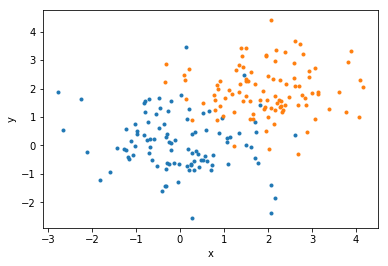

In [6]:
pl.plot(random_1[0], random_1[1], '.')
pl.plot(random_2[0], random_2[1], '.')
pl.xlabel('x')
pl.ylabel('y');

## 1. Choose the number of clusters

nclusters = 2 

In [7]:
random_stack = np.hstack([random_1, random_2])

## 2. Set a guess for initial centers

In [8]:
# fix the centers to a poor initial guess
centers = np.array([[0.,-1.], [0,-2]]) 

# a better initial guess would have been
#minval, maxval = min(random_stack[0]), max(random_stack[0])
#np.array((np.random.rand(4)   * (maxval - minval)) + minval).reshape(2,2)

In [9]:
#define the distance metric - just Eucledian distance
def distmetric(x, y, center):
    distmetric = np.sqrt( (x - center[0])**2 + (y - center[1])**2)
    return distmetric

## 3. Check for each point which center is closer

In [10]:
cl1 = distmetric(random_1[0], random_1[1], centers[0]) < distmetric(random_1[0], random_1[1], centers[1])
cl2 = distmetric(random_2[0], random_2[1], centers[0]) < distmetric(random_2[0], random_2[1], centers[1])

cl1

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,  True], dtype=bool)

## 4. Calculate new centers

In [11]:
newc = np.array(
    [np.hstack([random_1[:, cl1], random_2[:, cl2]]).mean(axis=1), 
        np.hstack([random_1[:, ~cl1], random_2[:, ~cl2]]).mean(axis=1)])
print ("old center\n", centers, "\nnew center\n", newc)

old center
 [[ 0. -1.]
 [ 0. -2.]] 
new center
 [[ 0.96972306  1.06522176]
 [ 1.02400655 -2.10176012]]


## 5. Iterate 3&4 untile convergence

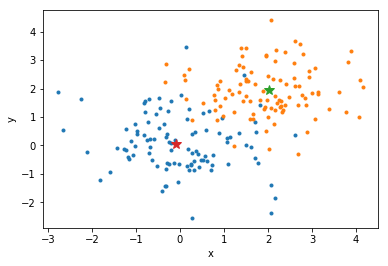

Iteration Number : 8
old centers : [[ 2.01522567  1.93589473]
 [-0.09470755  0.04900058]]
new centers : [[ 2.01522567  1.93589473]
 [-0.09470755  0.04900058]]


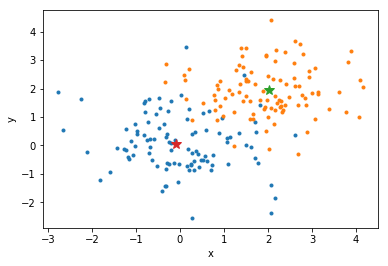

In [12]:
fig, ax = plt.subplots()

centers = np.array([[0.,-1.], [0,-2]]) 

l, = ax.plot(random_1[0], random_1[1], '.')
l2, = ax.plot(random_2[0], random_2[1], '.')
l3, = ax.plot(centers[0,0], centers[0,1], '*', ms=10)
l4, = ax.plot(centers[1,0], centers[1,1], '*', ms=10)
ax.set_xlabel('x')
ax.set_ylabel('y');


l.set_data(random_1[0], random_1[1])
l2.set_data(random_2[0], random_2[1])
l3.set_data(centers[0,0], centers[0,1])
l4.set_data(centers[1,0], centers[1,1])
time.sleep(1)
clear_output(wait=True)
display(fig)


#cl1 = distmetric(random_1[0], random_1[1], centers[0]) < distmetric(random_1[0], random_1[1], centers[1])
#cl2 = distmetric(random_2[0], random_2[1], centers[0]) < distmetric(random_2[0], random_2[1], centers[1])

#newc = np.array(
    #[np.hstack([random_1[:, cl1], random_2[:, cl2]]).mean(axis=1), 
       #np.hstack([random_1[:, ~cl1], random_2[:, ~cl2]]).mean(axis=1)])

print("Iteration Number : {}".format(0))
print("old centers : {}".format(centers))
print("new centers : {}".format(newc))

iterat = 0
while ( not(np.array_equal(newc,centers))) and iterat  < 10 :
    centers = newc
    cl1 = distmetric(random_1[0], random_1[1], centers[0]) < distmetric(random_1[0], random_1[1], centers[1])
    cl2 = distmetric(random_2[0], random_2[1], centers[0]) < distmetric(random_2[0], random_2[1], centers[1])
    newc = np.array([np.hstack([random_1[:, cl1], random_2[:, cl2]]).mean(axis=1),np.hstack([random_1[:, ~cl1], random_2[:, ~cl2]]).mean(axis=1)])
    l.set_data(random_1[0], random_1[1])
    l2.set_data(random_2[0], random_2[1])
    l3.set_data(newc[0,0], newc[0,1])
    l4.set_data(newc[1,0], newc[1,1])
    time.sleep(0.5)
    clear_output(wait=True)
    display(fig)
    print("Iteration Number : {}".format(iterat+1))
    print("old centers : {}".format(centers))
    print("new centers : {}".format(newc))
    iterat = iterat + 1

pl.show()

__Figure 1__ : Illustrating K-mean clustering, from a purposely chosen "bad" initial guess till convergence. 